In [ ]:
!pip install tensorflow

In [ ]:
!pip install keras numpy matplotlib mnist

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load Dataset
(xtrain,ytrain),(xtest,ytest) = keras.datasets.mnist.load_data()

In [ ]:
xtrain

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain[9999].shape

(28, 28)

In [ ]:
xtrain[999]

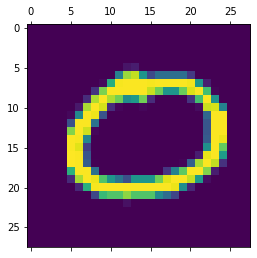

In [ ]:
plt.matshow(xtest[69])


In [ ]:
#Feature Scaling
#Normalize (As we have aloue of 0-255 for each pixel)

xtrain = (xtrain / 255)

In [ ]:
xtrain[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
xtest = xtest/255

In [ ]:
xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
#Flatten the images into 28*28 = 784
xtrain = xtrain.reshape(-1,784)
xtest = xtest.reshape(-1,784)

In [ ]:
xtrain[1]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
xtrain.shape

(60000, 784)

In [ ]:
#simple 3 layer model is deined
#model could be sequetial or functional. Seqiential is easy to use
model = keras.Sequential()
model.add( Dense(64, activation='relu',input_dim = 784))#input Layer
model.add( Dense(64, activation='relu')) #hidden Layer
model.add( Dense(10, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 64)                50240     
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Loss function- 2 popular   1. Binary cross entropy  2. Categorical cross entroy

In [ ]:
#optimized - popular optimizer 1.SGD 2.Adam 3.RMSprop 4.Adadelta 5.Adagrad 6.Adamax 7.Nadam

In [ ]:
model.compile(
    optimizer = 'adam', loss='categorical_crossentropy', metrics = ['accuracy']
)

In [ ]:
model.fit(xtrain,
          to_categorical(ytrain),
          epochs=10,
          batch_size=32,
    
)

In [ ]:
#Evaluate
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.0996 - accuracy: 0.9745


[0.09964261949062347, 0.9745000004768372]

In [ ]:
pred = model.predict(xtest)

In [ ]:
pred

array([[2.0883455e-09, 7.4513792e-07, 4.6019488e-07, ..., 9.9981207e-01,
        1.5184252e-08, 9.8897972e-06],
       [3.5469479e-13, 1.0585683e-07, 9.9999988e-01, ..., 1.4641993e-09,
        9.5853503e-09, 5.9924846e-19],
       [1.4821944e-08, 9.9932098e-01, 8.7698201e-05, ..., 2.7435960e-04,
        3.0347644e-04, 4.2202353e-09],
       ...,
       [2.0163878e-18, 1.1799398e-13, 2.9677026e-14, ..., 4.1025978e-09,
        4.3079498e-12, 1.9579185e-09],
       [9.9913668e-19, 2.2022870e-17, 1.6987777e-19, ..., 3.4019488e-18,
        2.7327275e-12, 3.3549095e-18],
       [8.8640431e-15, 6.1605484e-13, 2.7403597e-11, ..., 1.8541225e-17,
        7.4859520e-13, 1.1437693e-18]], dtype=float32)

In [ ]:
np.argmax(pred[69])

0